In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd


In [2]:
df = pd.read_csv('placement.csv')
df.head(),df.shape

(   cgpa  package
 0  6.89     3.26
 1  5.12     1.98
 2  7.82     3.25
 3  7.42     3.67
 4  6.94     3.57,
 (200, 2))

Text(0, 0.5, 'Package(in lpa)')

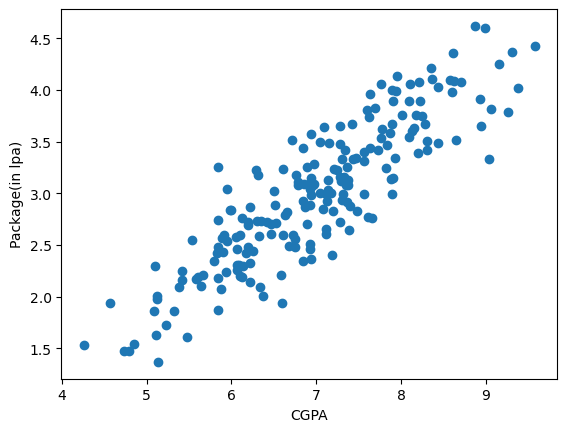

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [4]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

X , y

(     cgpa
 0    6.89
 1    5.12
 2    7.82
 3    7.42
 4    6.94
 ..    ...
 195  6.93
 196  5.89
 197  7.21
 198  7.63
 199  6.22
 
 [200 rows x 1 columns],
 0      3.26
 1      1.98
 2      3.25
 3      3.67
 4      3.57
        ... 
 195    2.46
 196    2.57
 197    3.24
 198    3.96
 199    2.33
 Name: package, Length: 200, dtype: float64)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Text(0, 0.5, 'Package(in lpa)')

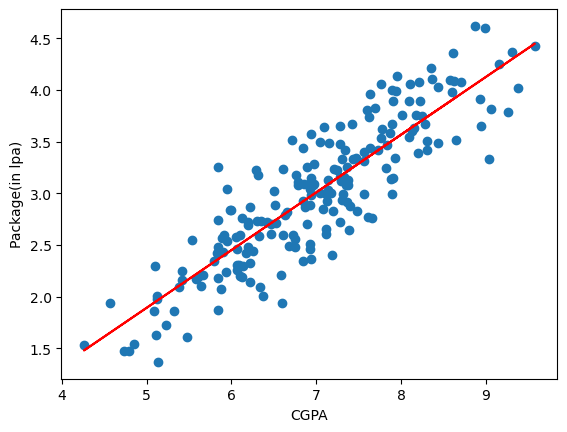

In [7]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred = lr.predict(X_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [9]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [10]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [11]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [12]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [13]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [14]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [15]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.107719,3.26
1,5.12,0.807894,1.98
2,7.82,0.214412,3.25
3,7.42,0.078961,3.67
4,6.94,0.842997,3.57


Text(0, 0.5, 'Package(in lpa)')

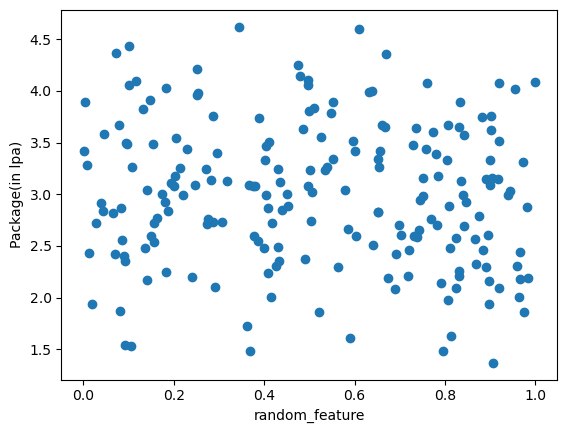

In [16]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [17]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [18]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7859461262859705


In [19]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7743756466257528

In [20]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

new_df2.sample(5)

,cgpa,iq,package
69,7.30,3.04,2.94
100,7.95,5.14,4.14
133,6.05,2.18,2.58
9,8.31,2.81,3.51
177,7.09,3.34,3.64


Text(0, 0.5, 'Package(in lpa)')

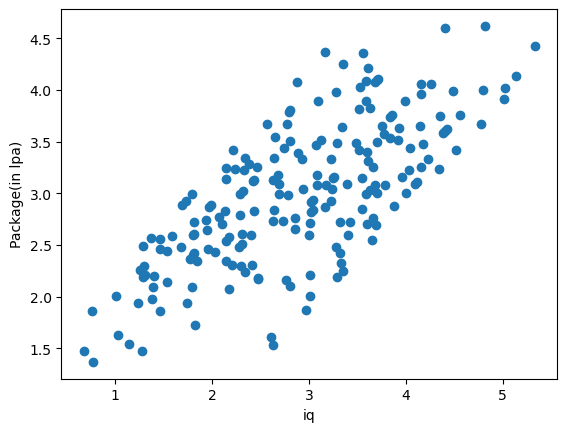

In [21]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [22]:
np.random.randint(-100,100)

36

In [23]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [24]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8188969813999988


In [25]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.809107629043242